In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
smartphones = pd.read_csv('/content/cleaned_smartphone_data.csv')
smartphones.head(5)

,Product Name,Rating,Price,Discount (%),Price Before Discount,Resolution,Operating System,RAM (GB),Primary Camera,Battery Capacity (mAh),Brand Name,Ratings Count,Reviews Count,Internal Storage (GB)
0,"Infinix Note 40 5G (Racing Grey, 256 GB)",4.2,15999,36.0,24999,2400 x 1080 Pixels,Android 14,8.0,108MP + 2MP + 2MP,5000.0,Infinix,7,817,256
1,"realme 14 Pro+ 5G (Pearl White, 128 GB)",4.5,29999,11.0,33999,2800 x 1272 Pixels,Android 15,8.0,50MP + 50MP + 8MP,6000.0,realme,561,51,128
2,"SAMSUNG Galaxy F05 (Twilight Blue, 64 GB)",4.2,6499,35.0,9999,1600 x 720 Pixels,Android 14,4.0,50MP + 2MP,5000.0,SAMSUNG,28,612,64
3,"MOTOROLA g05 (Forest Green, 64 GB)",4.3,6999,30.0,9999,1612 x 720 Pixels,Android 15,4.0,50MP Rear Camera,5200.0,MOTOROLA,2,196,64
4,"SAMSUNG Galaxy A54 5G (Awesome Graphite, 256 GB)",4.3,23999,47.0,45999,2340 x 1080 Pixels,Android 13,8.0,50MP + 12MP + 5MP,5000.0,SAMSUNG,4,373,256


In [4]:
smartphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Product Name            761 non-null    object 
 1   Rating                  761 non-null    object 
 2   Price                   761 non-null    int64  
 3   Discount (%)            761 non-null    float64
 4   Price Before Discount   761 non-null    int64  
 5   Resolution              761 non-null    object 
 6   Operating System        761 non-null    object 
 7   RAM (GB)                761 non-null    float64
 8   Primary Camera          761 non-null    object 
 9   Battery Capacity (mAh)  761 non-null    float64
 10  Brand Name              761 non-null    object 
 11  Ratings Count           761 non-null    int64  
 12  Reviews Count           761 non-null    int64  
 13  Internal Storage (GB)   761 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory 

In [5]:
df = smartphones.copy()

In [6]:
df.head(2)

,Product Name,Rating,Price,Discount (%),Price Before Discount,Resolution,Operating System,RAM (GB),Primary Camera,Battery Capacity (mAh),Brand Name,Ratings Count,Reviews Count,Internal Storage (GB)
0,"Infinix Note 40 5G (Racing Grey, 256 GB)",4.2,15999,36.0,24999,2400 x 1080 Pixels,Android 14,8.0,108MP + 2MP + 2MP,5000.0,Infinix,7,817,256
1,"realme 14 Pro+ 5G (Pearl White, 128 GB)",4.5,29999,11.0,33999,2800 x 1272 Pixels,Android 15,8.0,50MP + 50MP + 8MP,6000.0,realme,561,51,128


# **Data Analysis Of Smartphones Dataset**

Q 1. What is the distribution of prices across all products?

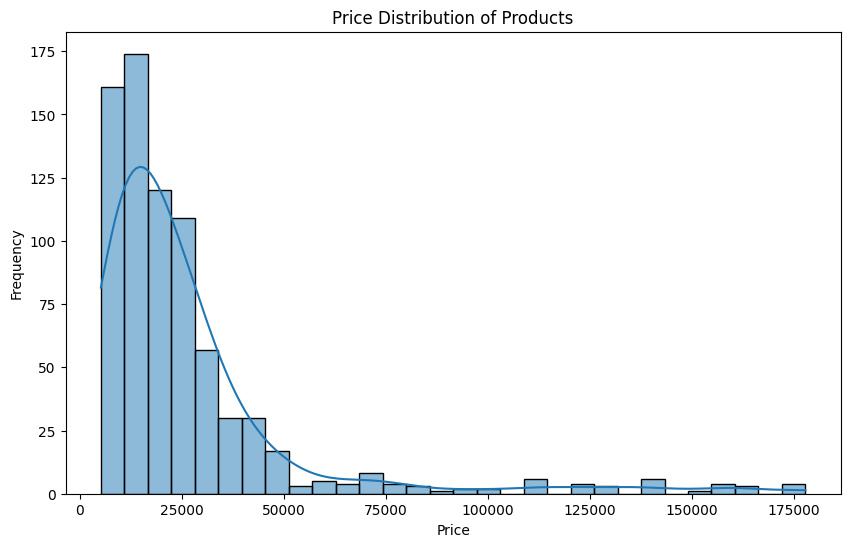

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [8]:
summary_stats = df['Price'].describe()
summary_stats

,Price
count,761.000000
mean,26908.938239
std,28236.257011
min,5239.000000
25%,11699.000000
50%,18500.000000
75%,28999.000000
max,177900.000000


Q 2. What is the average price of products in the dataset?

In [9]:
df['Price'].mean()

26908.938239159

Q 3. How many products have discounts, and what is the average discount percentage?

In [10]:
products_with_discount = df[df['Discount (%)'] > 0]
count_discounted_products = products_with_discount.shape[0]
print(f"Number of products with discounts: {count_discounted_products}")

average_discount = df['Discount (%)'].mean()
print(f"Average discount percentage: {average_discount:.2f}%")

Number of products with discounts: 761
Average discount percentage: 22.57%


Q 4. What is the relationship between price and discount percentage?

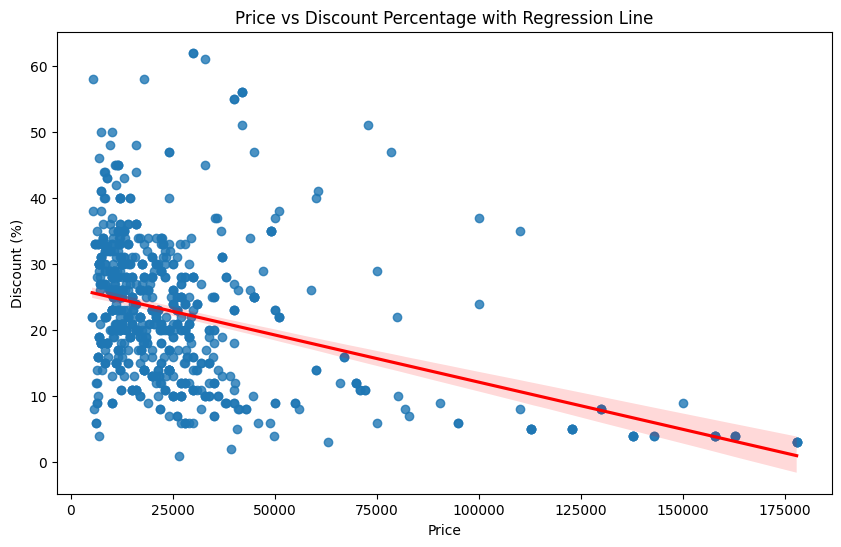

In [12]:
plt.figure(figsize=(10,6))
sns.regplot(x=df['Price'], y=df['Discount (%)'], line_kws={'color': 'red'})
plt.title('Price vs Discount Percentage with Regression Line')
plt.xlabel('Price')
plt.ylabel('Discount (%)')
plt.show()

In [13]:
correlation = df['Price'].corr(df['Discount (%)'])
print(f"Correlation between Price and Discount: {correlation:.2f}")

Correlation between Price and Discount: -0.38


Q 5. What is the correlation between price and ratings?

In [18]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

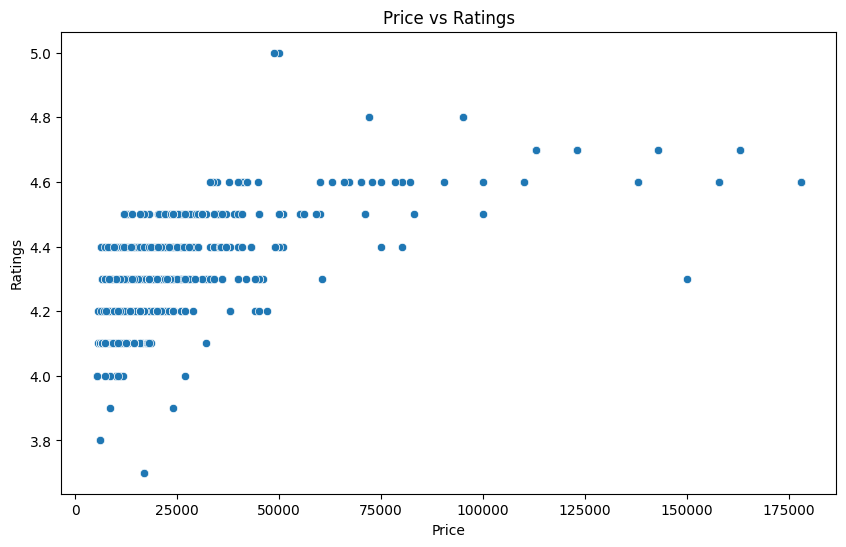

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Price'], y=df['Rating'])
plt.title('Price vs Ratings')
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.show()

In [20]:
correlation = df['Price'].corr(df['Rating'])
print(f"Correlation between Price and Ratings: {correlation:.2f}")

Correlation between Price and Ratings: 0.61


Q 6. What is the distribution of ratings for the products?

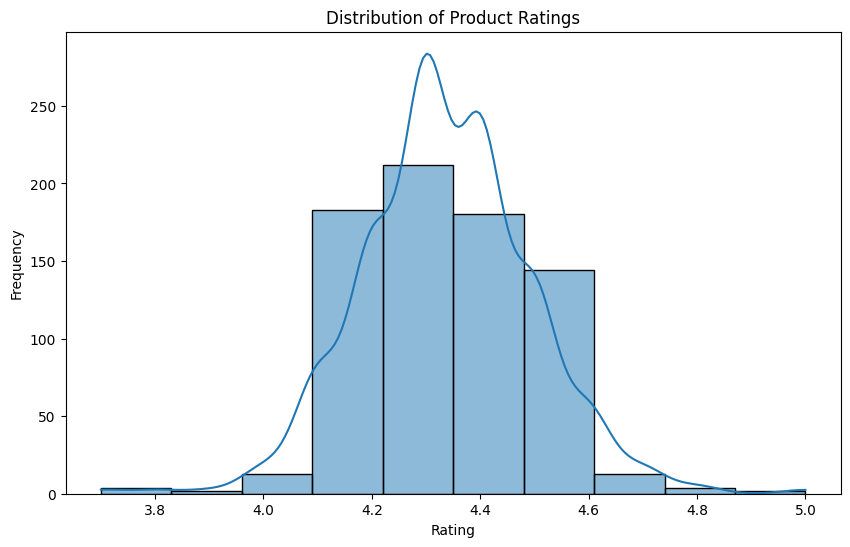

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(df['Rating'], kde=True, bins=10)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [22]:
summary_stats_ratings = df['Rating'].describe()
summary_stats_ratings

,Rating
count,757.000000
mean,4.337517
std,0.158509
min,3.700000
25%,4.200000
50%,4.300000
75%,4.400000
max,5.000000


Q 7. What is the most common operating system used in these products?

In [26]:
os_counts = df['Operating System'].value_counts()
os_counts.head(1)

,count
Operating System,
Android 14,374


Q 8. What is the average battery capacity for products in the dataset?

In [29]:
average_battery_capacity = df['Battery Capacity (mAh)'].mean()
print(f"The average battery capacity for the products is: {average_battery_capacity:.2f} mAh")

The average battery capacity for the products is: 5127.84 mAh


Q 9. What is the distribution of RAM (GB) in the dataset?

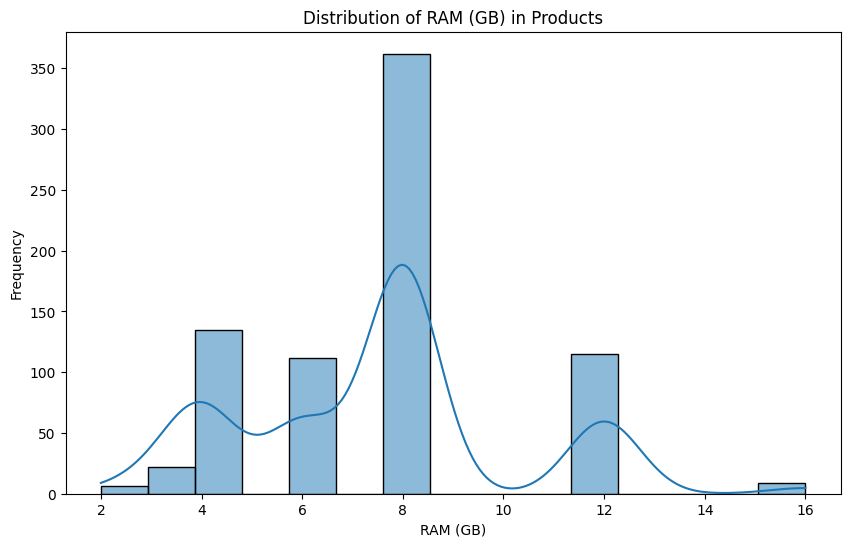

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df['RAM (GB)'], kde=True, bins=15)
plt.title('Distribution of RAM (GB) in Products')
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')
plt.show()

Q 10. How many products have a high rating but low reviews count?

In [31]:
high_rating_threshold = 4.0
low_reviews_threshold = 50

high_rating_low_reviews = df[(df['Rating'] >= high_rating_threshold) & (df['Reviews Count'] < low_reviews_threshold)]

count_high_rating_low_reviews = high_rating_low_reviews.shape[0]

print(f"Number of products with high rating but low review count: {count_high_rating_low_reviews}")

Number of products with high rating but low review count: 192


Q 11. What is the most common brand in the dataset?

In [35]:
brand_counts = df['Brand Name'].value_counts()
brand_counts.head(1)

,count
Brand Name,
realme,130


Q 12. What is the relationship between internal storage (GB) and price?

In [37]:
# Creating categories for internal storage
bins = [0, 32, 64, 128, 256, 512, 1024]  # Define your storage bins
labels = ['0-32GB', '32-64GB', '64-128GB', '128-256GB', '256-512GB', '512GB+']
df['Storage Category'] = pd.cut(df['Internal Storage (GB)'], bins=bins, labels=labels)

# Box plot to see the distribution of price across storage categories
plt.figure(figsize=(10,6))
sns.boxplot(x='Storage Category', y='Price', data=df)
plt.title('Price Distribution by Internal Storage Category')
plt.xlabel('Storage Category')
plt.ylabel('Price')
plt.show()

TypeError: '<' not supported between instances of 'int' and 'str'

Q 13. What is the average battery capacity for each brand?

In [38]:
average_battery_by_brand = df.groupby('Brand Name')['Battery Capacity (mAh)'].mean()

print(average_battery_by_brand)

Brand Name
(Refurbished)    5000.000000
Apple            4949.714286
CMF              5000.000000
Google           4564.076923
IQOO             5355.172414
Infinix          4968.947368
LAVA             5000.000000
MOTOROLA         5050.000000
Mi               4625.000000
Motorola         5010.750000
Nokia            5000.000000
Nothing          5000.000000
OPPO             5205.000000
OnePlus          5378.947368
POCO             5176.590909
REDMI            5124.952381
SAMSUNG          5127.000000
Tecno            5000.000000
Xiaomi           4700.000000
itel             4769.230769
realme           5190.000000
vivo             5240.000000
Name: Battery Capacity (mAh), dtype: float64


Q 14. What is the price distribution for each operating system?

In [42]:
price_stats = df.groupby('Operating System')['Price'].describe()
price_stats

,count,mean,std,min,25%,50%,75%,max
Operating System,,,,,,,,
Android,20.0,20607.900000,10652.062073,6449.0,10627.75,26903.0,29086.75,34870.0
Android 10,2.0,7180.000000,424.264069,6880.0,7030.00,7180.0,7330.00,7480.0
Android 11,6.0,12545.666667,6389.821834,5389.0,9992.00,10448.5,13974.00,23999.0
Android 12,27.0,20578.851852,19538.548294,7290.0,9999.00,12999.0,20999.00,99999.0
Android 12 (Go Edition),1.0,8299.000000,NaN,8299.0,8299.00,8299.0,8299.00,8299.0
Android 12 Go,1.0,7490.000000,NaN,7490.0,7490.00,7490.0,7490.00,7490.0
Android 13,116.0,20330.706897,17097.817825,7365.0,10483.75,14781.0,23071.00,109999.0
Android 13 Go,11.0,6833.545455,1025.869033,5239.0,6699.00,6699.0,7299.00,8999.0
Android 14,374.0,22243.799465,14238.969090,5499.0,12499.00,19999.0,27749.00,149999.0


Q 15. How do the number of ratings correlate with the number of reviews?

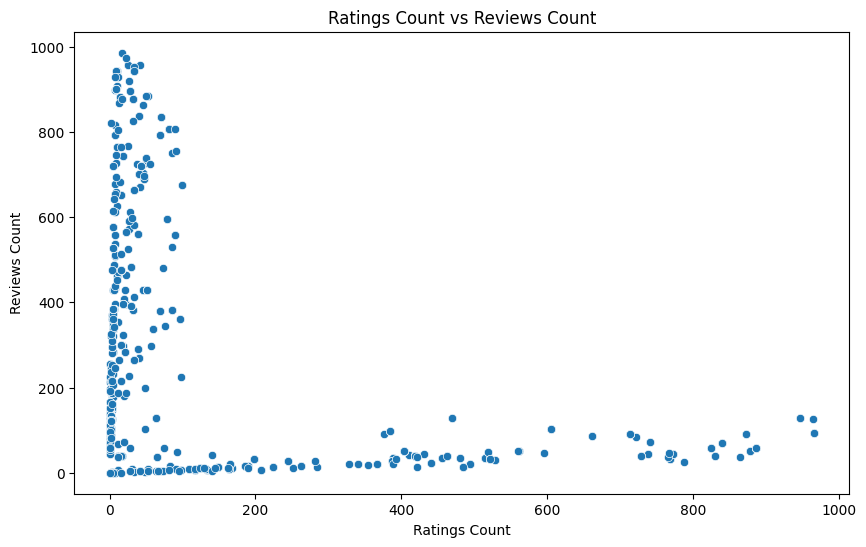

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Ratings Count', y='Reviews Count', data=df)
plt.title('Ratings Count vs Reviews Count')
plt.xlabel('Ratings Count')
plt.ylabel('Reviews Count')
plt.show()

In [44]:
correlation = df['Ratings Count'].corr(df['Reviews Count'])
print(f"Correlation between Ratings Count and Reviews Count: {correlation:.2f}")

Correlation between Ratings Count and Reviews Count: -0.39


Q 16. What is the average rating for products with specific features (e.g., high RAM or high battery capacity)?

In [46]:
high_ram_products = df[df['RAM (GB)'] > 8]

average_rating_high_ram = high_ram_products['Rating'].mean()

print(f"Average Rating for Products with RAM > 8 GB: {average_rating_high_ram:.2f}")

Average Rating for Products with RAM > 8 GB: 4.41


In [47]:
high_battery_products = df[df['Battery Capacity (mAh)'] > 4000]

average_rating_high_battery = high_battery_products['Rating'].mean()

print(f"Average Rating for Products with Battery Capacity > 4000 mAh: {average_rating_high_battery:.2f}")

Average Rating for Products with Battery Capacity > 4000 mAh: 4.34


In [48]:
high_feature_products = df[(df['RAM (GB)'] > 8) & (df['Battery Capacity (mAh)'] > 4000)]

average_rating_high_features = high_feature_products['Rating'].mean()

print(f"Average Rating for Products with RAM > 8 GB and Battery Capacity > 4000 mAh: {average_rating_high_features:.2f}")

Average Rating for Products with RAM > 8 GB and Battery Capacity > 4000 mAh: 4.41


Q 17. Are there any outliers in terms of price, rating, or discount percentage?

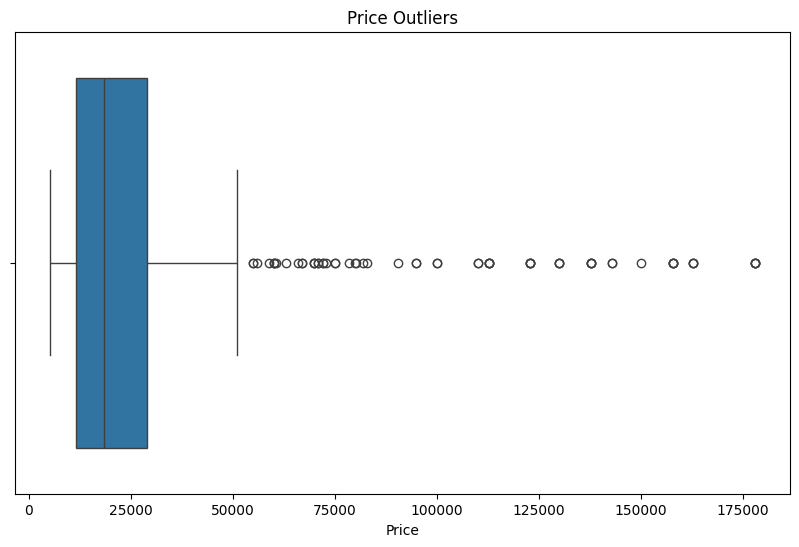

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Price'])
plt.title('Price Outliers')
plt.show()

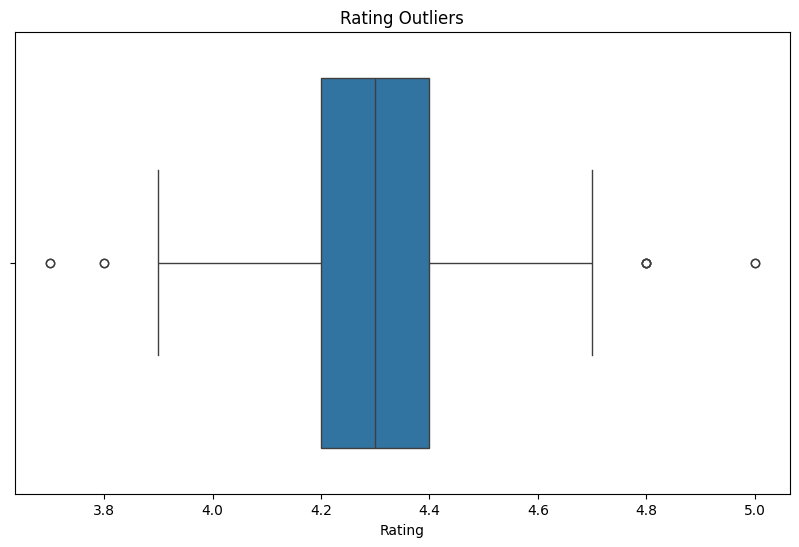

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Rating'])
plt.title('Rating Outliers')
plt.show()

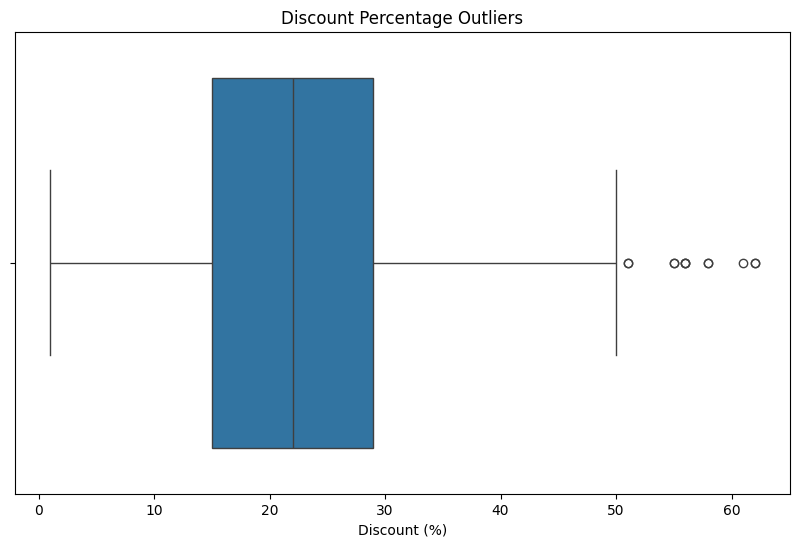

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Discount (%)'])
plt.title('Discount Percentage Outliers')
plt.show()

Q 18. Which operating system has the highest average rating?

In [52]:
avg_rating_by_os = df.groupby('Operating System')['Rating'].mean()

highest_avg_rating_os = avg_rating_by_os.idxmax()
highest_avg_rating = avg_rating_by_os.max()

print(f"The operating system with the highest average rating is '{highest_avg_rating_os}' with an average rating of {highest_avg_rating:.2f}")

The operating system with the highest average rating is 'Android Oxygen 15' with an average rating of 4.80


Q 19. How does the discount percentage correlate with the number of reviews?

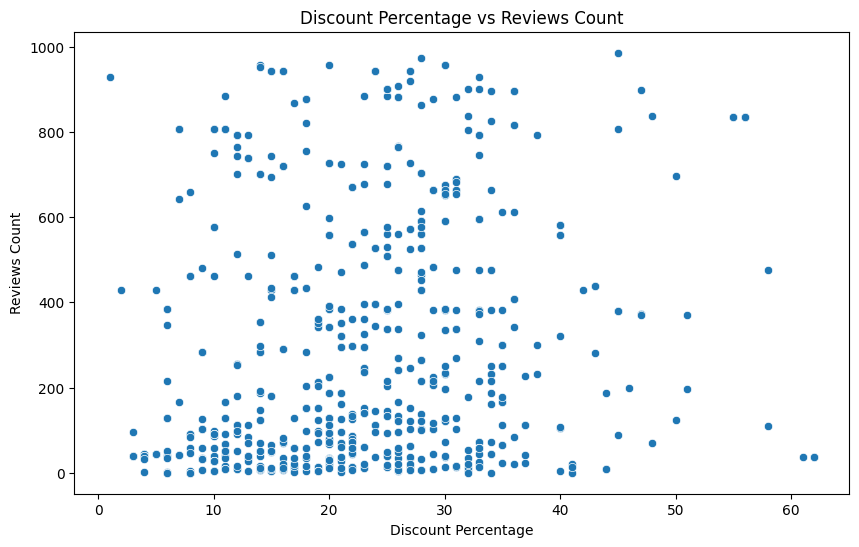

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Discount (%)', y='Reviews Count', data=df)
plt.title('Discount Percentage vs Reviews Count')
plt.xlabel('Discount Percentage')
plt.ylabel('Reviews Count')
plt.show()

In [55]:
correlation = df['Discount (%)'].corr(df['Reviews Count'])
print(f"Correlation between Discount Percentage and Reviews Count: {correlation:.2f}")

Correlation between Discount Percentage and Reviews Count: 0.22
